In [2]:
from autofit import conf
from autofit.core import non_linear as nl
from autolens.pipeline import phase as ph
from autolens.imaging import image as im
from autolens.imaging import mask as ma
from autolens.lensing import ray_tracing
from autolens.model.galaxy import galaxy as g, galaxy_model as gm
from autolens.lensing import lensing_fitting
from autolens.lensing import lensing_image as li
from autolens.model.profiles import light_profiles as lp
from autolens.model.profiles import mass_profiles as mp
from autolens.imaging.plotters import imaging_plotters
from autolens.lensing.plotters import lensing_fitting_plotters

# Up to now, we've fitted some fairly crude and unrealistic lens models. For example, we'e completely omitted the lens
# galaxy's light, and its mass has been modeled as a sphere. Given most lens galaxies are literally called 'elliptical'
# galaxies, we should probably model their mass as elliptical. In this example, we'll start using a more realistic
# lens model.

# In my experience, the simplest lens model (e.g. that has the fewest parameters) that one can fit to a real strong 
# lens and still get a reasonable fit is as follows:

# 1) An elliptical Sersic light-profile for the lens galaxy's light.
# 2) A singular isothermal ellipsoid (SIE) mass-profile for the lens galaxy's mass.
# 3) An elliptical exponential light-profile for the source galaxy's light (to be honest, even this is a gross
# over-simplification, but lets worry about that later).

# This has a total of 18 non-linear parameters, which is over double the number of parameters we've fitted up to now.
# In future exercises, we'll fit even more complex models, with some 20-30+ non-linear parameters.

# The goal of this, rather short, exercise, is to fit this 'realistic' model to a simulated image, where the lens's
# light is visible and mass is elliptical. What could go wrong?

In [4]:
# If you are using Docker, the paths to config will automatically be linked and you don't need to 
# do anything in this cell!

# If you arn't using docker, you need to change the path below to the chapter 2 directory and uncomment 
# both lines below.
# path = '/home/user/workspace/howtolens/chapter_2_lens_modeling'
# conf.instance = conf.Config(config_path=path+'/configs/3_realism_and_complexity', output_path=path+"/output")

In [6]:
# Another simulate image function, albeit it generates a new image
def simulate():

    from autolens.imaging import mask
    from autolens.model.galaxy import galaxy as g
    from autolens.lensing import ray_tracing

    psf = im.PSF.simulate_as_gaussian(shape=(11, 11), sigma=0.05, pixel_scale=0.05)
    image_plane_grids = mask.ImagingGrids.grids_for_simulation(shape=(130, 130), pixel_scale=0.1, psf_shape=(11, 11))

    lens_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.9, phi=45.0, intensity=0.04,
                                                             effective_radius=0.5, sersic_index=3.5),
                           mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0, einstein_radius=0.8))

    source_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.5, phi=90.0, intensity=0.03,
                                                       effective_radius=0.3, sersic_index=3.0))
    tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                                 image_plane_grids=[image_plane_grids])

    image_simulated = im.Image.simulate(array=tracer.image_plane_image_for_simulation, pixel_scale=0.1,
                                                   exposure_time=300.0, psf=psf, background_sky_level=0.1, add_noise=True)

    return image_simulated

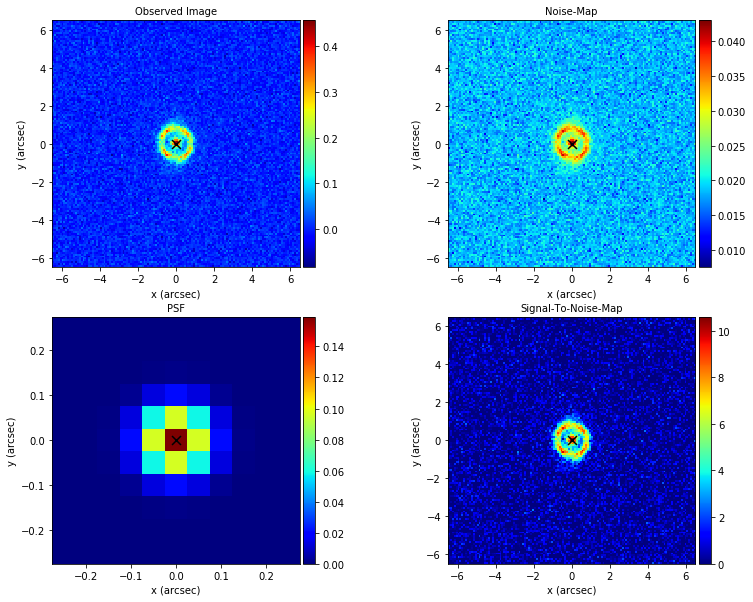

In [7]:
# Simulate the image and set it up.
image = simulate()

# When we plot it, the lens light's is clealy visible in the centre of the image
imaging_plotters.plot_image_subplot(image=image)

In [8]:
# Now lets fit it using a phase, noting that indeed the galaxy-model corresponds to the one above.

# Because we now have 18 non-linear parameters. the non-linear search takes a lot longer to run. On my laptop, this 
# phase took around an hour, which is a bit too long for you to wait if you want to go through these tutorials quickly. 
# Therefore, the results of this non-linear search (and future ones) are already included, allowing you to
# go through the tutorial as if you had actually run them.

# Nevertheless, you could try running it yourself (maybe over your lunch break?). All you need to do is change the 
# phase_name below, maybe to something like 'howtolens/3_realism_and_complexity_rerun'
phase = ph.LensSourcePlanePhase(lens_galaxies=dict(lens_galaxy=gm.GalaxyModel(light=lp.EllipticalSersic,
                                                                                mass=mp.EllipticalIsothermal)),
                                source_galaxies=dict(source_galaxy=gm.GalaxyModel(light=lp.EllipticalExponential)),
                                optimizer_class=nl.MultiNest,
                                phase_name='3_realism_and_complexity')


In [9]:
# Lets run the phase - note that, in Jupyter notebooks, all the MultiNest output is written to the cell. This might
# get pretty long, but I wouldn't worry about it for now as we'll address this in the pipelines tutorial.
print('MultiNest has begun running - checkout the workspace/howtolens/chapter_2_lens_modeling/output/3_realism_and_complexity'
      'folder for live output of the results, images and lens model.'
      'This Jupyter notebook cell with progress once MultiNest has completed - this could take some time!')
results = phase.run(image)


MultiNest has begun running - checkout the workspace/howtolens/chapter_2_lens_modeling/output/3_realism_and_complexityfolder for live output of the results, images and lens model.This Jupyter notebook cell with progress once MultiNest has completed - this could take some time!


PriorLimitException: The physical value 0.050797207355499266 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07991256833076477 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.05529492497444153 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09879560589790345 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07734815478324891 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.0980099904537201 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.06369102597236634 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09922957301139831 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.06370775580406189 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.05585461258888245 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09486836910247803 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.046633095741271974 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07158150553703309 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04120744824409485 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09334646224975586 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.06009279608726502 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.0904684627056122 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.045163094997406006 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.06111981749534607 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.08807952284812928 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09481022953987123 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04666065096855164 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04948318958282471 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09893995523452759 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04027243733406067 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07500083565711976 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.0967370641231537 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09286874294281006 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04184875011444092 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.05495742082595825 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07896540880203248 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.047544764280319216 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.08101401209831238 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.08154888033866883 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07691280722618103 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09469223380088806 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.05044349551200867 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.08604278564453126 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09470909237861634 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.06935629844665528 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09408882975578309 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.0786157238483429 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.08132678985595704 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.07998208403587342 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.0401669442653656 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04173990249633789 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.04061884641647339 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.055129836797714236 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.09364481329917908 for a prior was not within its limits 0.1, 0.04

PriorLimitException: The physical value 0.05487674355506897 for a prior was not within its limits 0.1, 0.04

ValueError: could not convert string to float: '-0.100000000000000002+101   '

In [ ]:
# And lets look at the image.
lensing_fitting_plotters.plot_fitting_subplot(fit=results.fit)

NameError: name 'results' is not defined

In [ ]:
# Uh-oh. That image didn't look very good, did it? If we compare our inferred parameters to the actual values (in the
# simulations.py file) you'll see that we have, indeed, fitted the wrong model.
print(results)

In [ ]:
# Yep, we've inferred the wrong lens model. Or have we? Maybe you're thinking that this model provides an even higher 
# likelihood than the correct solution? Lets make absolutely sure it doesnt: (you've seen all this code below before,
# but I've put a few comments to remind you of whats happening)

# Create a lensing image to make the fit - the mask we used above was a 3" circle (we'll come back to this later)
mask = ma.Mask.circular(shape=image.shape, pixel_scale=image.pixel_scale, radius_mask_arcsec=3.0)
lensing_image = li.LensingImage(image=image, mask=mask)
imaging_plotters.plot_image(lensing_image.image)

# Make the tracer we use to simulate the image
lens_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.9, phi=45.0, intensity=0.04,
                                                 effective_radius=0.5, sersic_index=3.5),
                       mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0, einstein_radius=0.8))

source_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.5, phi=90.0, intensity=0.03,
                                                   effective_radius=0.3, sersic_index=3.0))
tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                             image_plane_grids=[lensing_image.grids])


In [ ]:
# Now, lets fit the lensing image with the tracer and plot the fit. It looks a lot better than above, doesn't it?
fit = lensing_fitting.fit_lensing_image_with_tracer(lensing_image=lensing_image, tracer=tracer)
lensing_fitting_plotters.plot_fitting_subplot(fit=results.fit)

In [ ]:
# Finally, just to be sure, lets compare the two likelihoods
print('Likelihood of Non-linear Search:')
print(results.fit.likelihood)
print('Likelihood of Correct Model:')
print(fit.likelihood)

# Well, there we have it, the input model has a much higher likelihood than the one our non-linear search inferred. 

In [ ]:
# Clearly, our non-linear search failed. So, what happened? Where did it all go wrong?

# I want you to think about 'complexity'. As we made our lens model more realistic, we also made it more complex. Our
# non-linear parameter space went from 7 dimensions to 18. This means there was a much larger 'volume' of parameter
# space to search. Maybe, therefore, our non-linear search got lost. It found some region of parameter space that it
# thought was the highest likelihood region and decided to focus the rest of its search there. But it was mistaken,
# there was infact  another region of parameter space with even higher likelihood solutions.

# This region - the one our non-linear search failed to locate - is called the global maximum likelihood region. At its
# core, lens modeling is all about learning how to get a non-linear search to find this region of parameter space,
# even when the lens model is extremely complex.

# Iif you did run the phase above yourself, you might of actually inferred the correct lens model. There is some 
# level of randomness in a non-linear search. This means that sometimes, it might get infer a locally maximal likelihood,
# and other times find the global maxima another. Nevertheless, as lens models become more complex, you'll quickly find
# yourself stuck with only in local maxima, unless you learn how to navigate parameter space better.

In [ ]:
# And with that, we're done. In the next exercise, we'll learn how to deal with our failures and begin thinking about
# how we might encourage a non-linear search to find the global-maximum likelihood. Before that, think about the
# following:

# 1) When you look at an image of a strong lens, do you get a sense of roughly what values certain lens model
#    parameters are?

# 2) The non-linear search failed because parameter space was too complex. Could we make it less complex, whilst still
#    keeping our lens model fairly realistic?

# 3) The source galaxy in this example had only 6 non-linear parameters. Real source galaxies may have multiple
#    components (e.g. a bar, disk, bulge, star-forming knot) and there may even be more than 1 source galaxy! Do
#    you think there is any hope of us navigating a parameter space if the source contributes 20+ parameters by itself?